# 4. Exploratory Data Analysis (EDA)

---

<p style="text-align: justify;">A continuación, se desarrollarán visualizaciones y se profundizará en cada una de las variables con el objetivo de generar insights relevantes para el desarrollo del modelo, así como para responder a algunas de las preguntas específicas que se han planteado anteriormente. Se empleará un análisis univariado y bivariado para buscar comprender las relaciones entre variables</p>

Primero, se importan las librerías requeridas y el conjunto de datos previamente procesado.

In [1]:

# Importación de datos y gestión de rutas
import sys
sys.path.append('..') # Folder principal del projecto
from config import PROCESSED_DATA_PATH

# Computación científica y manejo de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ydata_profiling

#Filtrar warnings
import warnings
warnings.filterwarnings('ignore')

 # For JupyterLyte
%matplotlib inline

In [2]:
# Importar conjunto de datos procesado
try:
    df = pd.read_csv(PROCESSED_DATA_PATH, low_memory=False)
except:
    raise FileNotFoundError('No se encontró el archivo, favor de ejecutar el Notebook "3_data_wrangling.ipynb"')

# Observar primeras filas del DataFrame
df.head(5)

date_received           product                                     issue  \
0    08/30/2013          Mortgage  Loan modification,collection,foreclosure   
1    08/30/2013          Mortgage  Loan servicing, payments, escrow account   
2    08/30/2013  Credit reporting    Incorrect information on credit report   
3    08/30/2013      Student loan                        Repaying your loan   
4    08/30/2013   Debt collection        False statements or representation   

                           company state zipcode              tags  \
0                     U.S. Bancorp    CA   95993  Regular American   
1            Wells Fargo & Company    CA   91104  Regular American   
2            Wells Fargo & Company    NY   11764  Regular American   
3          Navient Solutions, Inc.    MD   21402  Regular American   
4  Resurgent Capital Services L.P.    GA   30106  Regular American   

  submitted_via date_sent_to_company company_response_to_consumer  \
0      Referral           09/03/2013      Closed with explanation   
1      Referral           09/03/2013      Closed with explanation   
2   Postal mail           09/18/2013      Closed with explanation   
3         Email           08/30/2013      Closed with explanation   
4           Web           08/30/2013      Closed with explanation   

  timely_response consumer_disputed?  
0             Yes                Yes  
1             Yes                Yes  
2             Yes                 No  
3             Yes                Yes  
4             Yes                Yes

## 4.1 Análisis univariado

<p style="text-align: justify;"><b>¿Cómo se comporta la variable <i>product</i>? ¿Qué productos generan un mayor número de quejas?

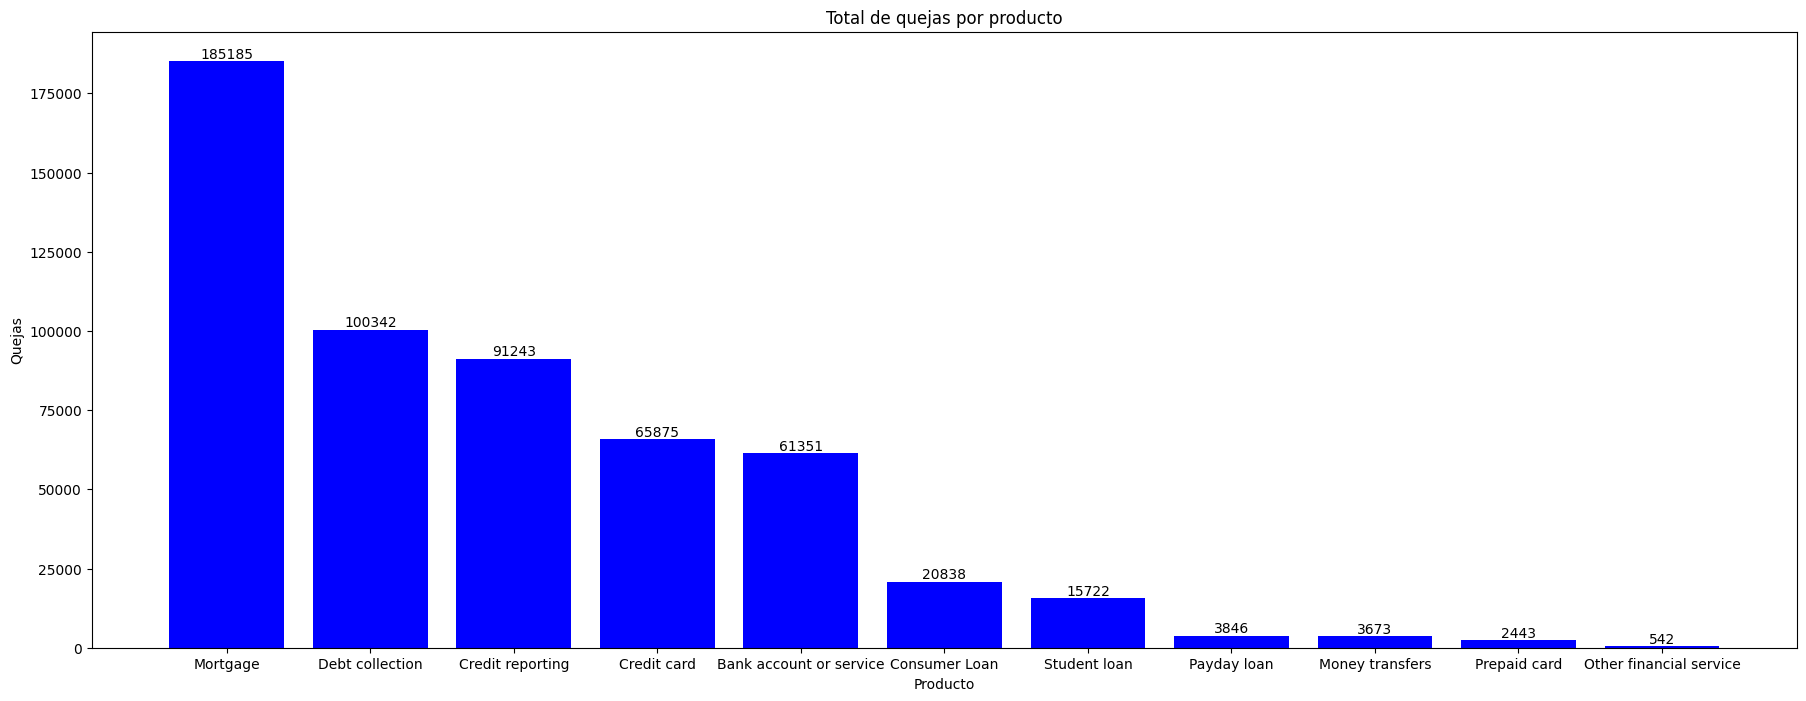

In [3]:
#Crear un DataFrame para procesar una visualización de las quejas por producto.
df_quejas_producto = pd.DataFrame(df['product'])
df_quejas_producto = df.groupby(df['product'])['product'].count()
df_quejas_producto.sort_values(ascending = False, inplace = True)
df_quejas_producto = pd.DataFrame(df_quejas_producto).T

suma_quejas = df_quejas_producto.sum()
suma_quejas.sort_values(ascending = False, inplace = True)

#Crear la visualización.
quejas_producto_fig, ax = plt.subplots(figsize = (22,8))
bars = ax.bar(df_quejas_producto.columns, suma_quejas, color = ['blue'])
ax.set_title('Total de quejas por producto')
ax.set_xlabel('Producto')
ax.set_ylabel('Quejas')
#Agregar etiquetas con el total de datos por barra
for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height}', ha='center',
  va='bottom')

<p style="text-align: justify;">El nivel de quejas en el sector hipotecario domina ampliamente en los Estados Unidos. Es esencial investigar el número de usuarios que utilizan este servicio, ya que puede ser el más recurrente por parte de los ciudadanos norteamericanos y esto podría tener un impacto significativo en el número de quejas. Cabe destacar que una gran porción de los datos se encuentran en 5 productos</p>

<p style="text-align: justify;"><b>¿Qué porcentaje de las quejas tuvieron una resolución por parte de la institución sin exceder su límite  de tiempo?</b></p>

In [4]:
##Procesar los datos para crear una visualización de las quejas clasificadas por su tiempo de respuesta.
df_respuestas_efic = df['timely_response'].value_counts().rename_axis('timely_response').reset_index(name='counts')

#Crear la visualización.
fig = px.bar(df_respuestas_efic, x="timely_response", y="counts",
              title = '¿Recibieron los usuarios una respuesta eficiente de acuerdo a una ventana de tiempo esperada?')
fig.update_layout(title_x=0.5)
fig.show()

<p style="text-align: justify;">Se puede apreciar como el grado de respuesta por parte de las instituciones financieras estadounidenses es bastante bueno, ya que suelen dar resoluciones en tiempo y forma de manera rápida a los usuarios. La proporción de esta variable es incluso más desbalanceada que la variable target. Si bien podrían tener una correlación positiva, sería arriesgado contemplarla como una variable determinante por sí sola, ya que apenas un 2.5% de los casos tienen un valor negativo.</p>

<p style="text-align: justify;">Ahora se llevará a cabo un análisis similar al que se llevó a cabo con la variable <i><b>product</b></i>, ya que las demás variables nominales en su mayoría cuentan con una variabilidad elevada, por lo que se observarán sus distribuciones para poder buscar obtener insights y tomar decisiones antes de pasar al desarrollo del algoritmo.</p>

<p style="text-align: justify;"><b>¿Cómo se distribuyen las frecuencias de los valores dentro de las demás variables de carácter nominal?<b></p>

<b><u>Variable <i>Issue</i></u></b>

In [5]:
# Contar la frecuencia de cada categoría en 'issue'
issue_counts = df['issue'].value_counts().reset_index()
issue_counts.columns = ['issue', 'count']  # Renombrar columnas para Plotly

# Parámetros de personalización
color = 'viridis'
opacity = 0.7
titulo = 'Conteo por categoría de la variable Issue'
x_label = 'Issue (problema por el cuál se presentó la queja)'
y_label = 'Frecuencia'

# Crear la visualización con px.bar()
fig = px.bar(
    issue_counts,
    x='issue',
    y='count',
    color='count',
    color_continuous_scale=px.colors.sequential.Viridis,
    opacity=opacity
)

# Customizar el layout del gráfico
fig.update_layout(
    title=titulo,
    xaxis_title=x_label,
    yaxis_title=y_label,
    bargap=0.1,
    showlegend=False,
    template='plotly_dark',
    title_x=0.5
)

fig.show()

<p style="text-align: justify;">Existe una gran cantidad de categorías con frecuencias bastante bajas, por lo que se podría buscar llevar a cabo una agrupación de las mismas. Posteriormente en el procedimiento de feature engineering se analizará llevar a cabo dicho procedimiento.</p>

<b><u>Variable <i>Company</i></u></b>

In [6]:
# Contar la frecuencia de cada compañía
company_counts = df['company'].value_counts().reset_index()
company_counts.columns = ['company', 'count']  # Renombrar columnas

# Parámetros de personalización
color = ['#FF5733', '#FFC300', '#33FF57', '#33FFC3', '#33C3FF']
opacity = 0.7
titulo = 'Conteo por categoría de la variable Company'
x_label = 'Compañía que recibió la queja'
y_label = 'Frecuencia'

# Crear el gráfico con px.bar()
fig = px.bar(
    company_counts,
    x='company',
    y='count',
    color='company',
    color_discrete_sequence=color,
    opacity=opacity
)

# Customizar layout
fig.update_layout(
    title=titulo,
    xaxis_title=x_label,
    yaxis_title=y_label,
    bargap=0.1,
    showlegend=False,
    template='plotly_dark',
    title_x=0.5
)

fig.show()

In [7]:
print(f'Total Companies: {len(df.groupby(df["company"])["company"].count())}')

Total Companies: 3599


In [8]:
print(f'Top 10 Companies: {df.groupby(df["company"])["company"].count().sort_values( ascending = False).head(10)}')

Top 10 Companies: company
Bank of America                           55402
Wells Fargo & Company                     41547
JPMorgan Chase & Co.                      33506
Equifax                                   31609
Experian                                  30720
TransUnion Intermediate Holdings, Inc.    25344
Citibank                                  25248
Ocwen                                     20855
Capital One                               15478
Nationstar Mortgage                       13167
Name: company, dtype: int64


In [9]:
print(f'Worst 10 Companies: {df.groupby(df["company"])["company"].count().sort_values( ascending = False).tail(10)}')

Worst 10 Companies: company
Retailers' Credit Association of Grass Valley, Inc.    1
Retail Recovery Service N. J., Inc.                    1
Resource Pro                                           1
Americas Mortgage Professionals, LLC                   1
American United Mortgage Corporation                   1
American Tax Holding LLC                               1
American Receivables Agency, LLC                       1
American Northwest Recovery Solutions Inc              1
Consumer Attorneys of America, P.A.                    1
Consider It Collected, LLC                             1
Name: company, dtype: int64


<p style="text-align: justify;">Sucede algo similar con las compañías, ya que podemos encontrar una amplia dominancia en las quejas presentadas para una cantidad muy pequeña de compañías, las cuales pueden ser aquellas con mayor volumen de usuarios en Estados Unidos. Incluso se cuenta con algunas compañías con un solo registro, por lo que no aportaría al análisis mantenerlas de manera individual. Se podría optar de igual manera por agrupar aquellas compañías con características similares, o todas aquellas que cuenten con una cantidad a partir de un número máximo de frecuencias. Otra alternativa sería reducir la muestra y el enfoque del proyecto a ciertas compañías, las cuales abarcan una gran porción del volumen de los datos.</p>

<b><u>Variable <i>State</i></u></b>

In [10]:
# Contar la frecuencia de cada estado
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']  # Renombrar columnas

# Parámetros de personalización
color = ['#FF5733', '#FFC300', '#33FF57', '#33FFC3', '#33C3FF']
opacity = 0.7
titulo = 'Conteo por categoría de la variable State'
x_label = 'Estado en el cuál se presentó la queja'
y_label = 'Frecuencia'

# Crear el gráfico
fig = px.bar(
    state_counts,
    x='state',
    y='count',
    color='state',
    color_discrete_sequence=color,
    opacity=opacity
)

# Customizar el layout del gráfico
fig.update_layout(
    title=titulo,
    xaxis_title=x_label,
    yaxis_title=y_label,
    bargap=0.1,
    showlegend=False,
    template='plotly_dark',
    title_x=0.5
)

fig.show()

In [11]:
print(f'Total States: {len(df.groupby(df["state"])["state"].count())}')

Total States: 62


In [12]:
print(f'Top 10 States: {df.groupby(df["state"])["state"].count().sort_values( ascending = False).head(10)}')

Top 10 States: state
CA    81700
FL    53671
TX    41352
NY    38265
GA    24548
NJ    22407
PA    20015
IL    19624
VA    18150
MD    17703
Name: state, dtype: int64


In [13]:
print(f'Worst 10 States: {df.groupby(df["state"])["state"].count().sort_values( ascending = False).tail(10)}')

Worst 10 States: state
AE    219
AP    153
VI    144
GU     69
FM     32
MH     27
MP     19
AS     17
AA      9
PW      9
Name: state, dtype: int64


<p style="text-align: justify;">Se puede observar que se cuenta con un total de 62 estados, y es que llevando a cabo una investigación sobre las siglas dentro de la página oficial de la CFPB (https://www.consumerfinance.gov/data-research/consumer-complaints/) se pudo observar que se incluyen colonias americanas, las cuales cuentan con una cantidad de valores bastante limitados, los cuales no aportan gran información para el análisis. Luego de analizar la distribución de esta variable, se ha presentado la posibilidad de reducir la variabilidad del modelo al delimitar el mismo a los 10 o 20 estados con mayor número de quejas en Estados Unidos, ya que cuentan con una amplia dominancia dentro del dataset, mientras que por otro lado existen valores muy poco significativos o que proporcionan muy poca información. Además, se considera que no tendría sentido agrupar a los demás estados, ya que como se ha observado, estos podrían poseer características bastante diferentes, sobre todo si tomamos en cuenta que se incluyen colonias americanas.</p>

<b><u>Variable <i>Zipcode</i></u></b>

In [14]:
# Observar códigos postales por region
zip_counts['region'] = df['zipcode'].astype(str).str[:3]

fig = px.treemap(zip_counts,
                 path=['region', 'zipcode'],
                 values='count',
                 title='Quejas por región y código postal')

fig.show()

NameError: name 'zip_counts' is not defined

In [ ]:
print(f'Total de Zipcodes: {len(df.groupby(df["zipcode"])["zipcode"].count())}')

Total de Zipcodes: 27049


In [ ]:
#Observar todos los registros de códigos postales que NO tienen una terminación adecuada con su conteo.
zipcode_list = np.array(df.zipcode)
zipcode_list
zipcode_xx = []
for zipcode in zipcode_list:
    if zipcode[-2:] == 'XX':
        zipcode_xx.append(zipcode)
        
def count_unique(array):
    unique_values, counts = np.unique(array, return_counts=True)
    return dict(zip(unique_values, counts))

count_unique(zipcode_xx)

{'0 7XX': 1,
 '006XX': 25,
 '007XX': 40,
 '008XX': 18,
 '009XX': 80,
 '010XX': 79,
 '011XX': 34,
 '012XX': 13,
 '013XX': 17,
 '014XX': 46,
 '015XX': 80,
 '016XX': 36,
 '017XX': 65,
 '018XX': 174,
 '019XX': 102,
 '020XX': 87,
 '021XX': 338,
 '022XX': 5,
 '023XX': 103,
 '024XX': 108,
 '025XX': 22,
 '026XX': 42,
 '027XX': 119,
 '028XX': 164,
 '029XX': 63,
 '030XX': 110,
 '031XX': 41,
 '032XX': 33,
 '033XX': 26,
 '034XX': 28,
 '035XX': 13,
 '036XX': 1,
 '037XX': 11,
 '038XX': 57,
 '039XX': 11,
 '040XX': 67,
 '041XX': 29,
 '042XX': 34,
 '043XX': 6,
 '044XX': 43,
 '045XX': 5,
 '046XX': 22,
 '047XX': 6,
 '048XX': 8,
 '049XX': 18,
 '050XX': 11,
 '051XX': 6,
 '052XX': 3,
 '053XX': 11,
 '054XX': 41,
 '056XX': 12,
 '057XX': 12,
 '058XX': 5,
 '060XX': 148,
 '061XX': 54,
 '062XX': 33,
 '063XX': 87,
 '064XX': 176,
 '065XX': 56,
 '066XX': 56,
 '067XX': 69,
 '068XX': 100,
 '069XX': 37,
 '07.XX': 1,
 '070XX': 586,
 '071XX': 102,
 '072XX': 58,
 '073XX': 107,
 '074XX': 125,
 '075XX': 26,
 '076XX': 125,
 

In [ ]:
print(f'Zipcodes Correctos: {len(zipcode_list)}')
print(f'Zipcodes con Terminación XX: {len(zipcode_xx)}')

Zipcodes Correctos: 551060
Zipcodes con Terminación XX: 77470


<p style="text-align: justify;">Se puede observar que existe una gran cantidad de valores con terminación "XX", por lo que no se podría saber con exactitud la ubicación de estas quejas. Una vez definida la manera en como se trabajarán los datos, es decir, si se emplea el modelo para cierto segmento (empresas o estados en específico), se analizarán estos registros para analizar si el código postal tiene un alto impacto dentro del modelo. Se puede observar que en una serie de códigos postales se generan más quejas que en otros. No obstante, muchos de estos picos muestran valores con terminación "XX", por lo que podrían estar agrupando todos los valores que contienen los primeros 3 dígitos iguales. Una solución interesante podría ser agrupar los códigos postales por los primeros tres dígitos y hacer un análisis geográfico más amplio, tomando en cuenta un punto medio entre ellos.</p>

<b><u>Variable <i>Submitted Via</i></u></b>

In [ ]:
# Contar la frecuencia de cada estado
sv_counts = df['submitted_via'].value_counts().reset_index()
sv_counts.columns = ['submitted_via', 'count']  # Renombrar columnas

# Parámetros de personalización
color = ['#FF5733', '#FFC300', '#33FF57', '#33FFC3', '#33C3FF']
opacity = 0.7
titulo = 'Conteo por categoría de la variable Submitted_via'
x_label = 'Medio por el cuál se presentó la queja'
y_label = 'Frecuencia'

# Crear el gráfico
fig = px.bar(
    sv_counts,
    x='submitted_via',
    y='count',
    color='submitted_via',
    color_discrete_sequence=color,
    opacity=opacity
)

# Customizar el layout del gráfico
fig.update_layout(
    title=titulo,
    xaxis_title=x_label,
    yaxis_title=y_label,
    bargap=0.1,
    showlegend=False,
    template='plotly_dark',
    title_x=0.5
)

fig.show()

<p style="text-align: justify;">Se puede observar que la mayoría de los usuarios presentan su queja a través de la web, por lo que podríamos estar hablando mayormente de un público adulto joven.</p>

**¿Cómo se han comportado las quejas por parte de los usuarios de servicios financieros a lo largo del tiempo?**

<p style="text-align: justify;">Es de gran interés el poder encontrar patrones o tendencias interesantes en cuanto al comportamiento de los datos que se tienen a la mano con respecto al tiempo.</p>

<p style="text-align: justify;">Se creará una Serie agrupando la cantidad de quejas por fecha, para posteriormente crear un DataFrame que permita manipular los datos en virtud de la visualización que se plantea ejecutar. Además, se creó la columna <i><b>date</b></i> para poder manipular los datos en formato de fecha con una mayor flexibilidad. Después, se agruparán los datos por mes para poder tener un gráfico más limpio y entendible, ya que al generarlo por días
se veía bastante enredoso y no se podía apreciar de buena manera el crecimiento o decrecimiento de las quejas a través 
del tiempo.</p>

In [15]:
#Agrupar el total de quejas por fecha.(día/mes/año).
total_quejas = df.groupby(df['date_received'])['product'].count()

#Crear y manipular el DataFrame con el cuál se alimentará la visualización.
df_total_quejas = pd.DataFrame(total_quejas)
df_total_quejas.index = pd.to_datetime(df_total_quejas.index)
df_total_quejas.sort_values(by = 'date_received', inplace = True)
df_total_quejas['date'] = df_total_quejas.index

#Crear el DataFrame agrupando el total de quejas por mes.
df_total_quejas = df_total_quejas.groupby(pd.Grouper(key='date', freq='1M')).sum()

#Crear los arrays para la visualización.
fecha = df_total_quejas.index
total = df_total_quejas.sum(axis = 'columns')
total.head(5)

date
2011-12-31    2532
2012-01-31    3240
2012-02-29    3512
2012-03-31    6226
2012-04-30    5663
Freq: ME, dtype: int64

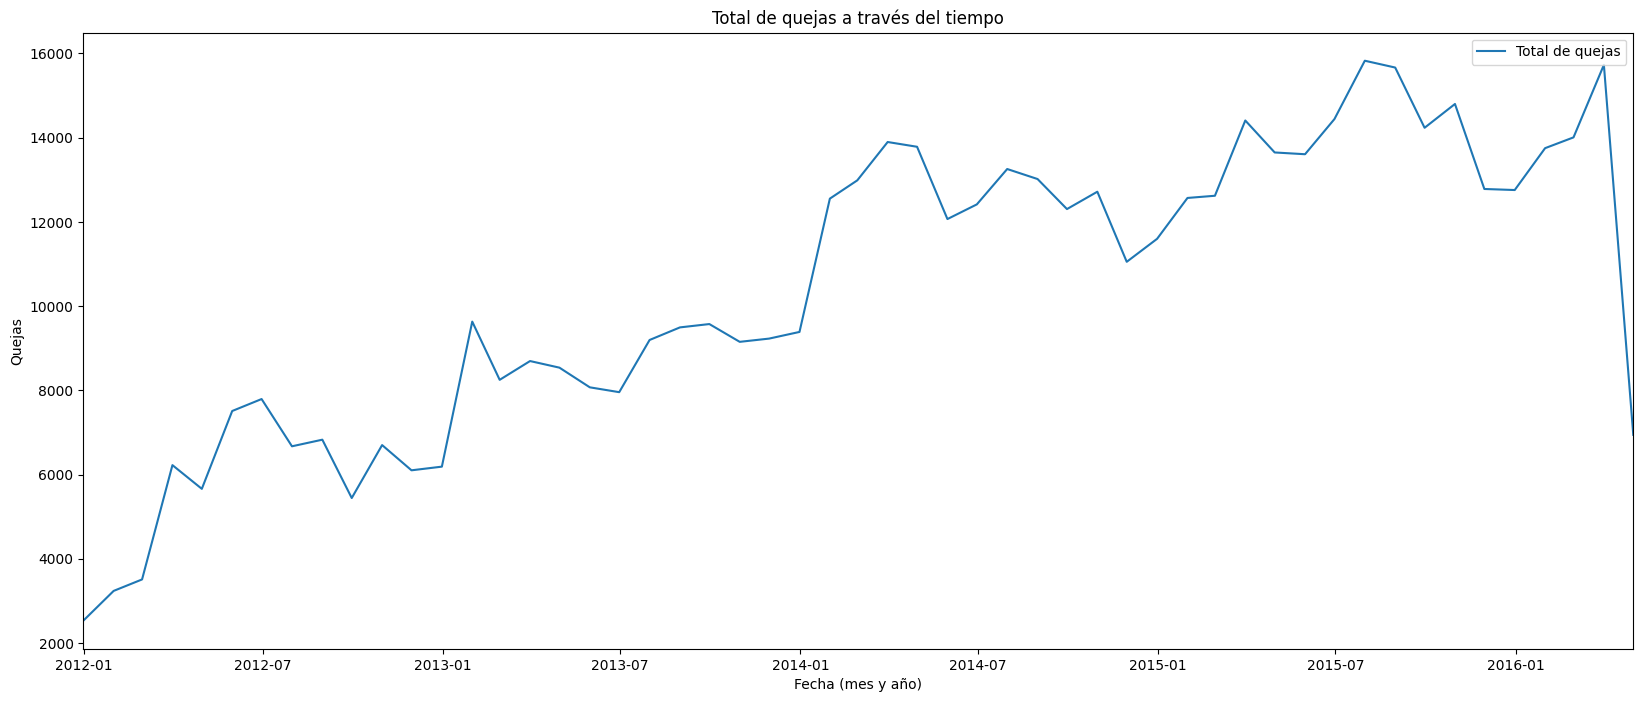

In [16]:
#Generar la visualización.
total_quejas_fig, ax = plt.subplots(figsize = (20,8))
ax.plot(fecha,total, label = 'Total de quejas')
ax.set_xlabel('Fecha (mes y año)')
ax.set_ylabel('Quejas')
ax.set_title('Total de quejas a través del tiempo')
ax.set_xlim(df_total_quejas.index[0], df_total_quejas.index[-1])
ax.legend()

<p style="text-align: justify;">Se puede observar como el nivel de quejas durante los primeros meses del año incrementa de manera significativa, ya que se generan picos bastante interesantes, los cuales usualmente suelen estabilizarse después del mes de julio. Ahora si bien muestra una potencial temporada donde los clientes suelen presentar más quejas, no tiene relación alguna con la variable target. Dicho esto, ahora se generará la misma serie de tiempo, dividiendo las quejas entre aquellas que concluyeron en una respuesta positiva por parte del usuario, con aquellas que generaron insatisfacción.</p>

In [17]:
#Crear dataframes para separar por mes las quejas que tuvieron disputa y las que no.
quejas = df.groupby(['date_received','consumer_disputed?'])['product'].count()
df_quejas = pd.DataFrame(quejas)
df_quejas.reset_index(inplace = True)

#Crear DataFrames segmentados para observar los picos en el tiempo contra la variable target.
df_disp = df_quejas[df_quejas['consumer_disputed?'] == 'Yes']
df_nodisp = df_quejas[df_quejas['consumer_disputed?'] == 'No']

#Agrupar las quejas segmentadas entre si hubo disputa o no por mes.
df_disp.date_received = pd.to_datetime(df_disp.date_received)
df_nodisp.date_received = pd.to_datetime(df_nodisp.date_received)
total_disp = df_disp.groupby(pd.Grouper(key='date_received', freq='1M')).sum()
total_disp['date'] = total_disp.index
total_nodisp = df_nodisp.groupby(pd.Grouper(key='date_received', freq='1M')).sum()
total_nodisp['date'] = total_nodisp.index

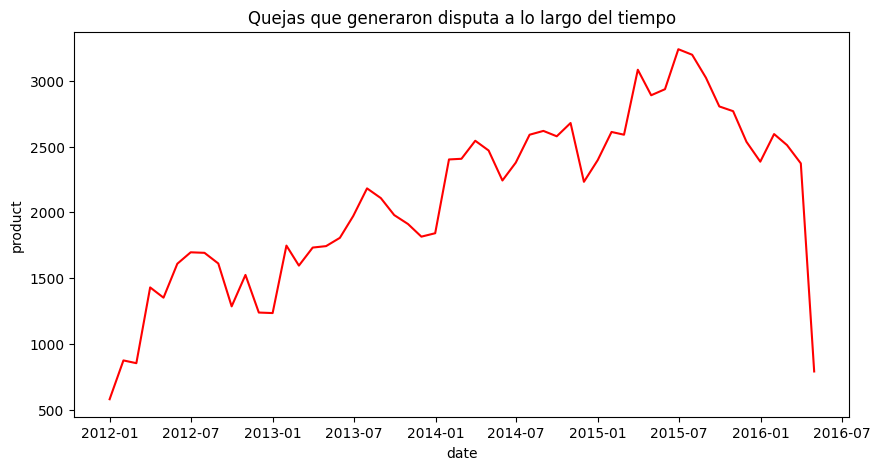

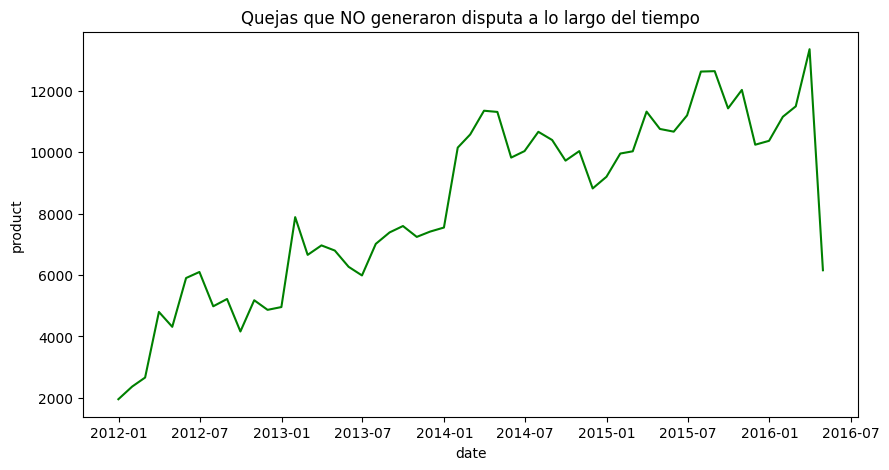

In [18]:
# Crear el primer gráfico.
plt.figure(figsize=(10, 5))
sns.lineplot(data=total_disp, x='date', y='product', color = 'red')
plt.title('Quejas que generaron disputa a lo largo del tiempo')

# Crear el segundo gráfico.
plt.figure(figsize=(10, 5))
sns.lineplot(data=total_nodisp, x='date', y='product', color = 'green')
plt.title('Quejas que NO generaron disputa a lo largo del tiempo')

plt.show()

<p style="text-align: justify;">Se puede observar una alta relación entre ambas gráficas con una tendencia al alza, y esto es debido al incremento de las quejas a lo largo del tiempo. Sin embargo, se pueden en algunos periodos comportamientos opuestos, como por ejemplo apenas después de 2012-07, donde las quejas que NO generaron disputa tienen un pico a la baja, mientras que aquellas con disputa crecieron.</p>

<p style="text-align: justify;">A continuación, se presenta un gráfico interactivo que busca mostrar los cambios de tendencia entre ambas líneas:</p>

In [19]:
#Ajustar los DataFrames creados previamente para crear una visualización que contraste ambas series de tiempo.
total_disp['Resolución de la queja'] = 'Quejas con disputa.'
total_nodisp['Resolución de la queja'] = 'Quejas sin disputa.'
df_concat = pd.concat([total_disp, total_nodisp], axis = 0)
df_concat.rename(columns={'date': 'Fecha', 'product': 'Número de quejas'}, inplace=True)

#Crear gráfico.
fig = px.line(df_concat, x="Fecha", y="Número de quejas", color='Resolución de la queja',
              title = 'Quejas Con Disputa vs. Quejas Sin Disputa (2012-2016)')
fig.update_layout(title_x=0.5)
fig.show()

<p style="text-align: justify;">Se pueden observar ciertos cambios de tendencia, más sin embargo no parecen ser determinantes, por lo que ahora se procederá a analizar el comportamiento de la satisfacción/insatisfacción en relación con las demás variables.</p>

## 4.2 Análisis bivariado

<p style="text-align: justify;">A continuación, se llevará a cabo un análisis entre la variable target y algunas de las variables que podrían tener un peso importante dentro del modelo.</p>

<b><u>Variable target: <i>Consumer Disputed?</i> vs. <i>State</i></u></b>

In [20]:
#Agrupar la cantidad de clientes satisfechos y no satisfechos por estado.

df1 = df.groupby('state')['consumer_disputed?'].apply(lambda x: (x=='Yes').sum()).reset_index(name='dispute')
df2 = df.groupby('state')['consumer_disputed?'].apply(lambda x: (x=='No').sum()).reset_index(name='no_dispute')
df1 = df1.set_index('state')
df2 = df2.set_index('state')

df_disputed_states = pd.concat([df1,df2], axis = 1)

df_disputed_states['total'] = df_disputed_states.sum(axis = 1)

#Crear columnas para observar las proporciones en cada estado.
df_disputed_states['dispute_perc'] = np.round((df_disputed_states['dispute'] / df_disputed_states['total']),3) * 100
df_disputed_states['no_dispute_perc'] = np.round((df_disputed_states['no_dispute'] / df_disputed_states['total']),3) * 100

#Mostrar los diez valores con mayor número de quejas con INSATISFACCIÓN por parte de los usuarios.
df_disputed_states.sort_values(by = 'dispute', ascending = False, inplace = True)
df_disputed_states.head(10)

dispute  no_dispute  total  dispute_perc  no_dispute_perc
state                                                           
CA       17615       64085  81700          21.6             78.4
FL       10443       43228  53671          19.5             80.5
TX        7601       33751  41352          18.4             81.6
NY        7463       30802  38265          19.5             80.5
GA        4802       19746  24548          19.6             80.4
NJ        4446       17961  22407          19.8             80.2
IL        4156       15468  19624          21.2             78.8
PA        3891       16124  20015          19.4             80.6
MD        3890       13813  17703          22.0             78.0
VA        3875       14275  18150          21.3             78.7

In [21]:
#Mostrar los diez valores con mayor número de quejas con SATISFACCIÓN por parte de los usuarios.
df_disputed_states.sort_values(by = 'no_dispute', ascending = False, inplace = True)
df_disputed_states.head(10)

dispute  no_dispute  total  dispute_perc  no_dispute_perc
state                                                           
CA       17615       64085  81700          21.6             78.4
FL       10443       43228  53671          19.5             80.5
TX        7601       33751  41352          18.4             81.6
NY        7463       30802  38265          19.5             80.5
GA        4802       19746  24548          19.6             80.4
NJ        4446       17961  22407          19.8             80.2
PA        3891       16124  20015          19.4             80.6
IL        4156       15468  19624          21.2             78.8
VA        3875       14275  18150          21.3             78.7
OH        3468       13912  17380          20.0             80.0

In [22]:
df_disputed_states.describe()

dispute    no_dispute         total  dispute_perc  no_dispute_perc
count     62.000000     62.000000     62.000000     62.000000        62.000000
mean    1794.822581   7093.241935   8888.064516     20.546774        79.453226
std     2906.665187  11256.344299  14154.590956      3.156140         3.156140
min        3.000000      6.000000      9.000000     15.800000        66.700000
25%      196.250000    840.000000   1036.250000     18.750000        78.550000
50%      637.500000   2490.500000   3087.500000     19.800000        80.200000
75%     2215.000000   8487.500000  10702.500000     21.450000        81.250000
max    17615.000000  64085.000000  81700.000000     33.300000        84.200000

<p style="text-align: justify;">Se puede observar que existe una gran dominancia de los cinco estados con mayor número de quejas, esto puede ser causa de la población y usuarios activos de servicios financieros dentro de los mismos. Si bien la proporción es similar en los cinco estados, podemos observar un ligero nivel de insatisfacción mayor en el estado de California. Además, se puede observar que la media del total de quejas por estado es de 8,888 con una desviación estandar bastante elevada y valores en los cuartiles con una variabilidad impactante (cabe destacar de igual manera que California por si solo presenta un total de 81,700 quejas).</p>

<p style="text-align: justify;">Además, se puede observar que la media de las quejas que dejaron instatisfechos a los usuarios es de un 20.56%.</p>

<p style="text-align: justify;">A continuación se procederá a realizar el mismo top 5, pero tomando como criterios las proporciones, en vez de los totales, para poder observar el comportamiento en los estados mas pequeños.</p>

In [23]:
#Mostrar los diez valores con mayor PROPORCIÓN de quejas con SATISFACCIÓN por parte de los usuarios.
df_disputed_states.sort_values(by = 'no_dispute_perc', ascending = False, inplace = True)
df_disputed_states.head(10)

dispute  no_dispute  total  dispute_perc  no_dispute_perc
state                                                           
MP           3          16     19          15.8             84.2
SD         122         635    757          16.1             83.9
NM         450        2326   2776          16.2             83.8
IA         408        1881   2289          17.8             82.2
LA         980        4423   5403          18.1             81.9
AR         432        1953   2385          18.1             81.9
OK         664        2966   3630          18.3             81.7
IN        1125        5014   6139          18.3             81.7
WV         266        1191   1457          18.3             81.7
MT         164         729    893          18.4             81.6

In [24]:
#Mostrar los diez valores con mayor PROPORCIÓN de quejas con INSATISFACCIÓN por parte de los usuarios.
df_disputed_states.sort_values(by = 'dispute_perc', ascending = False, inplace = True)
df_disputed_states.head(10)

dispute  no_dispute  total  dispute_perc  no_dispute_perc
state                                                           
PW           3           6      9          33.3             66.7
AA           3           6      9          33.3             66.7
AS           5          12     17          29.4             70.6
FM           8          24     32          25.0             75.0
AP          37         116    153          24.2             75.8
DE         669        2248   2917          22.9             77.1
HI         437        1500   1937          22.6             77.4
CO        2104        7391   9495          22.2             77.8
OR        1463        5141   6604          22.2             77.8
ME         428        1514   1942          22.0             78.0

<p style="text-align: justify;">Ahora, se crea un gráfico para poder observar las distribuciones de las proporciones de insatisfacción entre los usuarios.</p>

In [25]:
# Crear la visualización.
fig = px.histogram(df_disputed_states, x='dispute_perc', nbins=14)

# Customizar el gráfico.
color = ['#FF5733', '#FFC300', '#33FF57', '#33FFC3', '#33C3FF']
opacity = 0.7
titulo = 'Distribución de la proporción de insatisfacción de los usuarios'
x_label = 'Proporción de usuarios insatisfechos o que presentaron disputa (%).'

# Customizar el layout del gráfico.
fig.update_layout(
    title=titulo,
    xaxis_title=x_label,
    yaxis_title=y_label,
    bargap=0.1,
    showlegend=False,
    template='plotly_dark')

fig.update_layout(title_x=0.5)
fig.show()

<p style="text-align: justify;">Se puede observar que la gran mayoría de los datos de la proporción de usuarios insatisfechos se encuentra entre el 17.5% y el 22.5%. Además, los estados y colonias de Armed Forces Americas (AA), Palau (PW), American Samoa (AS), Federal States of Micronesia (FM) y Armed Forces Pacific (AP) son los cinco estados con mayor proporción de disputas/insatisfacción. Sin embargo, cuentan con muy pocos registros, por lo que la proporción puede verse alterada de gran manera fácilmente.</p>

<p style="text-align: justify;">Por otro lado, los estados y colonias de Northern Mariana Islands (MP), South Dakota (SD), New Mexico (NM), Iowa (IA) y Arkansas (AR) son los cinco estados con mayor proporción de satisfacción. De igual manera Northern Mariana Islands cuenta con una cantidad muy pequeña de registros, por lo que no se puede tomar en cuenta para el análisis. Además, cabe destacar que los demás estados en esta lista tienen una cantidad de registros muy por debajo de la media.</p>

<p style="text-align: justify;">Se logró detectar un insight bastante interesante, ya que todas las de mayor nivel de INSATISFACCIÓN son colonias americanas o pertenecen a las fuerzas armadas, lo cual muestra un patrón bastante interesante.</p>

<b><u>Variable target: <i>Consumer Disputed?</i> vs. <i>Company</i></u></b>

In [26]:
#Agrupar la cantidad de clientes satisfechos y no satisfechos por compañía.

df3 = df.groupby('company')['consumer_disputed?'].apply(lambda x: (x=='Yes').sum()).reset_index(name='dispute')
df4 = df.groupby('company')['consumer_disputed?'].apply(lambda x: (x=='No').sum()).reset_index(name='no_dispute')
df3 = df3.set_index('company')
df4 = df4.set_index('company')

df_disputed_company = pd.concat([df3,df4], axis = 1)

df_disputed_company['total'] = df_disputed_company.sum(axis = 1)

#Crear columnas para observar las proporciones en cada compañía.
df_disputed_company['dispute_perc'] = np.round((df_disputed_company['dispute'] / df_disputed_company['total']),3) * 100
df_disputed_company['no_dispute_perc'] = np.round((df_disputed_company['no_dispute'] / df_disputed_company['total']),3) * 100

df_disputed_company.sort_values(by = 'dispute', ascending = False)

dispute  no_dispute  total  dispute_perc  \
company                                                                 
Bank of America                12362       43040  55402          22.3   
Wells Fargo & Company           9532       32015  41547          22.9   
JPMorgan Chase & Co.            7639       25867  33506          22.8   
Equifax                         6607       25002  31609          20.9   
Citibank                        5199       20049  25248          20.6   
...                              ...         ...    ...           ...   
A.I.T. Credit Services Inc.        0           1      1           0.0   
A.C.S. Companies, Inc. I           0           3      3           0.0   
Xtreme Products LLC                0           2      2           0.0   
iFreedom Direct Corporation        0           8      8           0.0   
i3 Lending, Inc                    0           1      1           0.0   

                             no_dispute_perc  
company                                       
Bank of America                         77.7  
Wells Fargo & Company                   77.1  
JPMorgan Chase & Co.                    77.2  
Equifax                                 79.1  
Citibank                                79.4  
...                                      ...  
A.I.T. Credit Services Inc.            100.0  
A.C.S. Companies, Inc. I               100.0  
Xtreme Products LLC                    100.0  
iFreedom Direct Corporation            100.0  
i3 Lending, Inc                        100.0  

[3599 rows x 5 columns]

<p style="text-align: justify;">Se puede observar que existe una gran cantidad de compañías con una cantidad muy baja de registros, ocasionando que en algunos casos el porcentaje de satisfacción sea del 100% o viceversa. Esto haría que estas no fueran significativas para generar un modelo de predicción, por lo que se analizará realizar el modelo únicamente para las compañías que cuentan con un determinado número de registros, ya que son las que tienen un mayor impacto en el sector financiero estadounidense, y facilitarán la creación del modelo al reducir la variabilidad.</p>

<b><u>Variable target: <i>Consumer Disputed?</i> vs. <i>Product</i></u></b>

In [27]:
#Agrupar la cantidad de clientes satisfechos y no satisfechos por producto.
df5 = df.groupby('product')['consumer_disputed?'].apply(lambda x: (x=='Yes').sum()).reset_index(name='dispute')
df6 = df.groupby('product')['consumer_disputed?'].apply(lambda x: (x=='No').sum()).reset_index(name='no_dispute')
df5 = df5.set_index('product')
df6 = df6.set_index('product')

df_disputed_product = pd.concat([df5,df6], axis = 1)

df_disputed_product['total'] = df_disputed_product.sum(axis = 1)

#Crear columnas para observar las proporciones en cada producto.
df_disputed_product['dispute_perc'] = np.round((df_disputed_product['dispute'] / df_disputed_product['total']),3) * 100
df_disputed_product['no_dispute_perc'] = np.round((df_disputed_product['no_dispute'] / df_disputed_product['total']),3) * 100

#Analizar el porcentaje de CONFORMIDAD/INCONFORMIDAD de acuerdo a cada producto.
df_disputed_product = df_disputed_product.sort_values( by = 'dispute_perc', ascending = False)
df_disputed_product = df_disputed_product.reset_index()
df_disputed_product.sort_values(by='dispute_perc', ascending = False, inplace = True)
#df_disputed_product

In [28]:
#Ajustar el nombre de las variables.
df_disputed_product.rename(columns={'dispute_perc': 'Insatisfacción (Disputa)',
                                    'no_dispute_perc': 'Satisfacción (No Disputa)'}, inplace=True)

# Crear la visualización.
fig = px.bar(df_disputed_product, x='product', y=['Insatisfacción (Disputa)', 'Satisfacción (No Disputa)'],
             barmode='group', labels={'Insatisfacción (Disputa)': 'Porcentaje de Insatisfacción',
                                      'Satisfacción (No Disputa)': 'Porcentaje de Satisfacción'},
             template='plotly_dark')
fig.update_traces(marker_color=['#FF5733', '#33C3FF'], opacity=0.8)

# Agregar etiquetas de texto para cada valor.
fig.update_traces(texttemplate='%{y:.2f}%', textposition='inside')

# Customizar el layout del gráfico.
fig.update_layout(
    title='Porcentajes de Satisfacción e Insatisfacción por Producto',
    xaxis_title='Producto',
    yaxis_title='Porcentaje',
    legend_title_text='Proporciones:',
    barmode='group',
    showlegend=True,
    bargap=0.2,
    uniformtext_minsize=12,
    uniformtext_mode='hide',
    font=dict(size=14, family='Arial'),
    margin=dict(l=60, r=60, t=80, b=80),
    plot_bgcolor='#212529',
    paper_bgcolor='#1f1f1f')

fig.update_layout(title_x=0.5)
fig.show()

<p style="text-align: justify;">Existe una mayor proporción de INSATISFACCIÓN en cuanto a la resolución de las quejas que se presentan en productos hipotecarios, préstamos y tarjetas de crédito. Las variaciones entre cada una de ellas son pequeñas, más sin embargo, si se comparan las proporciones de los productos de cada extremo nos muestra que sí podría ser una variable importante para el desarrollo del modelo.</p>

<b><u>Variable target: <i>Consumer Disputed?</i> vs. <i>Company Reponse to Consumer</i></u></b>

In [29]:
#Agrupar la cantidad de clientes satisfechos y no satisfechos por respuesta.

df7 = df.groupby('company_response_to_consumer')['consumer_disputed?'].apply(lambda x: (x=='Yes').sum()).reset_index(name='dispute')
df8 = df.groupby('company_response_to_consumer')['consumer_disputed?'].apply(lambda x: (x=='No').sum()).reset_index(name='no_dispute')
df7 = df7.set_index('company_response_to_consumer')
df8 = df8.set_index('company_response_to_consumer')

df_disputed_response = pd.concat([df7,df8], axis = 1)

df_disputed_response['total'] = df_disputed_response.sum(axis = 1)

#Crear columnas para observar las proporciones en cada producto.
df_disputed_response['dispute_perc'] = np.round((df_disputed_response['dispute'] / df_disputed_response['total']),3) * 100
df_disputed_response['no_dispute_perc'] = np.round((df_disputed_response['no_dispute'] / df_disputed_response['total']),3) * 100

#Analizar el porcentaje de CONFORMIDAD/INCONFORMIDAD de acuerdo a la resolución que se le dio al usuario.
df_disputed_response = df_disputed_response.sort_values( by = 'dispute_perc', ascending = False)
df_disputed_response = df_disputed_response.reset_index()
df_disputed_response.sort_values(by='dispute_perc', ascending = False, inplace = True)

#Eliminar los valores cuyo valor sea "In progress".
df_disputed_response = df_disputed_response[(df_disputed_response['company_response_to_consumer'] != 'In progress')]
df_disputed_response

company_response_to_consumer  dispute  no_dispute   total  dispute_perc  \
0            Closed without relief     4835       12981   17816          27.1   
1          Closed with explanation    89786      310917  400703          22.4   
2                           Closed     2879       10361   13240          21.7   
3               Closed with relief      707        4556    5263          13.4   
4  Closed with non-monetary relief     8903       60788   69691          12.8   
5      Closed with monetary relief     4167       33688   37855          11.0   
6                Untimely response        2        2761    2763           0.1   

   no_dispute_perc  
0             72.9  
1             77.6  
2             78.3  
3             86.6  
4             87.2  
5             89.0  
6             99.9

In [30]:
#Ajustar el nombre de las variables.
df_disputed_response.rename(columns={'dispute_perc': 'Insatisfacción (Disputa)',
                                    'no_dispute_perc': 'Satisfacción (No Disputa)'}, inplace=True)

# Crear la visualización.
fig = px.bar(df_disputed_response, x='company_response_to_consumer', y=['Insatisfacción (Disputa)', 'Satisfacción (No Disputa)'],
             barmode='group', labels={'Insatisfacción (Disputa)': 'Porcentaje de Insatisfacción',
                                      'Satisfacción (No Disputa)': 'Porcentaje de Satisfacción'})
fig.update_traces(marker_color=['#FF5733', '#33C3FF'], opacity=0.8)

# Agregar etiquetas de texto para cada valor.
fig.update_traces(texttemplate='%{y:.2f}%', textposition='inside')

# Customizar el layout del gráfico.
fig.update_layout(
    title='Proporción de Satisfacción/Insatisfacción Según la Respuesta de la Empresa',
    xaxis_title='Respuesta de la empresa al usuario',
    yaxis_title='Porcentaje',
    legend_title_text='Proporciones:',
    barmode='group',
    showlegend=True,
    bargap=0.2,
    uniformtext_minsize=12,
    uniformtext_mode='hide',
    font=dict(size=14, family='Arial'),
    margin=dict(l=60, r=60, t=80, b=80),
    plot_bgcolor='#f8f8f8',
    paper_bgcolor='#f8f8f8')

fig.update_layout(title_x=0.5)
fig.show()

<p style="text-align: justify;">Todos aquellos casos categorizados como "Closed without relief" suelen generar con mayor frecuencia un sentimiento de insatisfacción por parte de los usuarios, y es que este hace referencia a que se cerró el caso sin asistencia o compensación hacia el mismo. Por otro lado, llama la atención que aquellos casos en los que se le explicó al cliente la situación, cuenta con un mayor grado de insatisfacción que aquellos casos que no tuvieron explicación (Closed with explanation / Closed). Finalmente es interesante como aquellos casos que NO generaron una respuesta oportuna (Untimely response) no generan disputas por parte de los usuarios.</p>


<p style="text-align: justify;">Recuerda que aquellos casos categorizados como "In Progress" aún no cuentan con una resolución.</p>

## 4.3 Ydata Profiler

<p style="text-align: justify;">A continuación, se implementa el uso de la librería ydata para la generación del reporte ProfileReport, con la finalidad de analizar las correlaciones de las variables, su comportamiento y datos estadísticos generales, además de observaciones adicionales que complementan el análisis exploratorio de losa datos para poder avanzar con el desarrollo de nuevas variables y posteriormente, a la implementación del algoritmo.</p>

In [31]:
profile = ydata_profiling.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:01<00:00,  6.20it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<p style="text-align: justify;">Se pueden generar distintas observaciones de alta relevancia dentro de este reporte, las cuales se enlistan a continuación:</p>

- <p style="text-align: justify;">Las variables del dataset en general cuentan con correlaciones bajas, lo cual nos indica que no tienen relación lineal, más no se descarta algún tipo de dependencia e influencia no lineal. No obstante, las variables product e issue cuentan con una correlación bastante elevada, la cuál se podría traducir en causalidad.</p>
- <p style="text-align: justify;">Algunas variables nominales como company, state y zipcode cuentan con una alta variabilidad, la cual podría afectar de manera significativa al modelo, por lo que se trabajará posteriormente en solucionar estas problemáticas.</p>
- <p style="text-align: justify;">Algunas variables, incluyendo la variable target, son altamente desbalanceadas, por lo que se deberá de recurrir a alguna técnica especial para poder llevar a cabo el proceso de aprendizaje del algoritmo, como lo son las técnicas de sobremuestreo y submuestreo.</p>
